In [1]:
# Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. 
# Plot the two-dimensional dataset.
# Then generalize to multiple linear regression and observe how the performance varies.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploading training-dataset
train = pd.read_csv("/Users/elisap/Desktop/DM2/new_train.csv")

#uploading test-dataset
test = pd.read_csv("/Users/elisap/Desktop/DM2/new_test.csv")

In [4]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [5]:
X_train = train[['tGravityAccmeanY']].values
y_train = train[['angleYgravityMean']].values
X_test = test[['tGravityAcc-mean()-Y']].values
y_test = test[['angle(Y,gravityMean)']].values

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[-0.793975]]
Intercept: 
 [0.06733155]


R2: 0.986
MSE: 0.001
MAE: 0.023


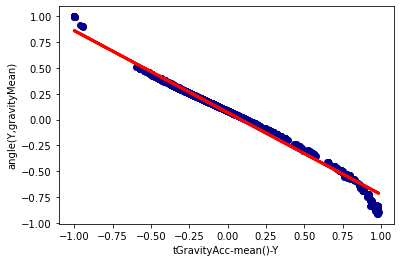

In [9]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test,  color='darkblue')
ax1.plot(X_test, y_pred, color='red', linewidth=3)     
ax1.set_xlabel('tGravityAcc-mean()-Y')
ax1.set_ylabel('angle(Y,gravityMean)')
plt.show()

In [10]:
res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
res

,Actual,Predicted
0,0.276801,0.291803
1,0.281343,0.296961
2,0.280083,0.295610
3,0.284114,0.300280
4,0.290722,0.307875
...,...,...
2942,0.274627,0.287039
2943,0.273578,0.285656
2944,0.274479,0.286599
2945,0.264782,0.275636


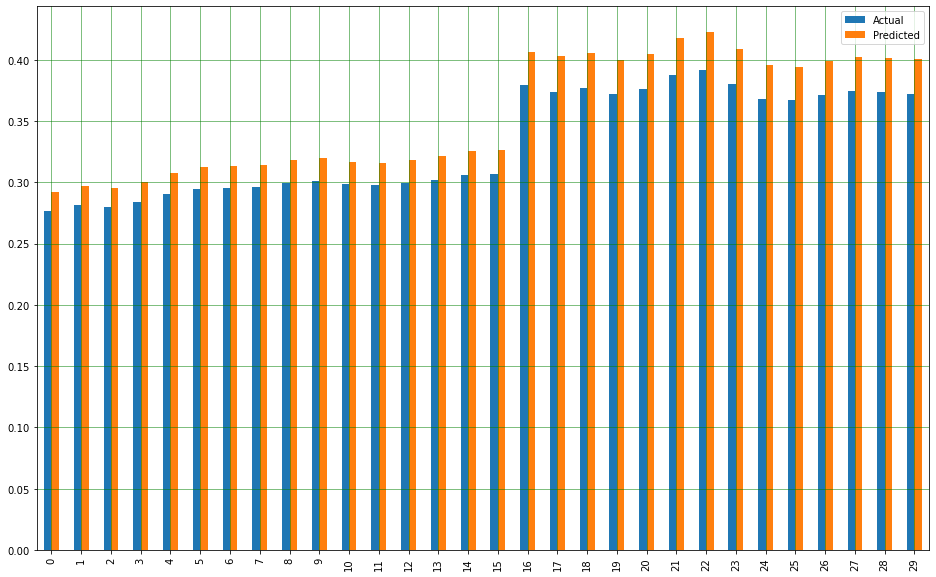

In [11]:
df1 = res[0:30]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)

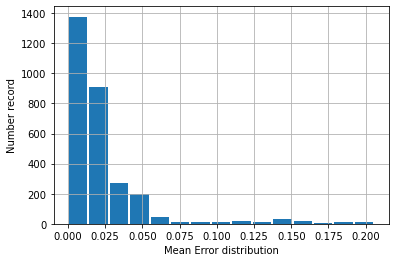

In [13]:
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("Mean Error distribution")
plt.ylabel("Number record")
plt.grid()
plt.show()

Coefficients: 
 [[-0.793975]]
Variance score: 0.9862971389692179


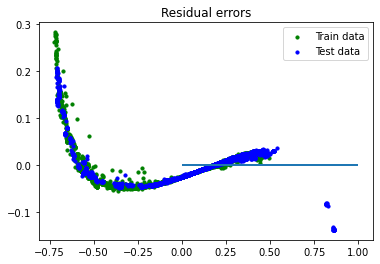

In [14]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 


## function to show plot 
plt.show()

# Evaluation of the Model

The final step is to evaluate the performance of the algorithm.
This step is especially important for comparing performance
of different algorithms on a given data set. For regression algorithms,
Three evaluation metrics are commonly used:

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.023014447929872506
Mean Squared Error: 0.0014406499529338367
Root Mean Squared Error: 0.037955894837743406


# LassoLarsCV

Cross-validated Lasso, using the LARS algorithm.
Unlike the LassoCV, it finds the relevant alphas values by itself. In general, because of this property, it will be more stable.

In [16]:
from sklearn.linear_model import LassoLarsCV
reg1 = LassoLarsCV()
reg1.fit(X_train, y_train)
print('Coefficients: \n', reg1.coef_)
print('Intercept: \n', reg1.intercept_)

Coefficients: 
 [-0.793975]
Intercept: 
 0.06733155395644481


R2: 0.986
MSE: 0.001
MAE: 0.023


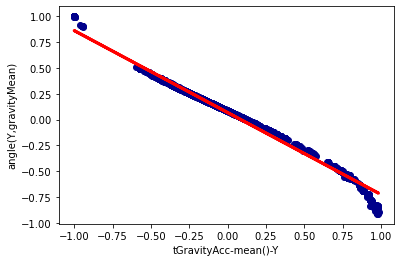

In [17]:
y_pred1 = reg1.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred1))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred1))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred1))

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test,  color='darkblue')
ax1.plot(X_test, y_pred1, color='red', linewidth=3)     
ax1.set_xlabel('tGravityAcc-mean()-Y')
ax1.set_ylabel('angle(Y,gravityMean)')
plt.show()

# Ridge


In [18]:
reg2 = Ridge()
reg2.fit(X_train, y_train)
print('Coefficients: \n', reg2.coef_)
print('Intercept: \n', reg2.intercept_)

Coefficients: 
 [[-0.79319626]]
Intercept: 
 [0.06732298]


R2: 0.986
MSE: 0.001
MAE: 0.023


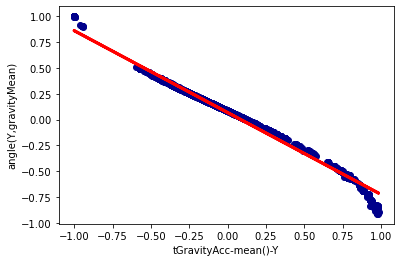

In [19]:
y_pred2 = reg2.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred2))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred2))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred2))

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test,  color='darkblue')
ax1.plot(X_test, y_pred2, color='red', linewidth=3)     
ax1.set_xlabel('tGravityAcc-mean()-Y')
ax1.set_ylabel('angle(Y,gravityMean)')
plt.show()

# HuberRegressor

Linear regression model that is robust to outliers.

In [20]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [21]:
reg3 = HuberRegressor().fit(X_train, y_train)
reg3.fit(X_train, y_train)
print('Coefficients: \n', reg3.coef_)
print('Intercept: \n', reg3.intercept_)

Coefficients: 
 [-0.73169157]
Intercept: 
 0.07549780896606902


R2: 0.975
MSE: 0.003
MAE: 0.020


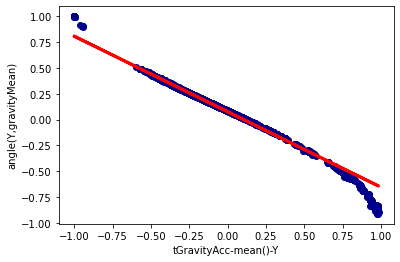

In [22]:
y_pred3 = reg3.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred3))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred3))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred3))

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test,  color='darkblue')
ax1.plot(X_test, y_pred3, color='red', linewidth=3)     
ax1.set_xlabel('tGravityAcc-mean()-Y')
ax1.set_ylabel('angle(Y,gravityMean)')
plt.show()

# Bayesian Ridge

In [23]:
from sklearn.linear_model import BayesianRidge

reg4 = BayesianRidge().fit(X_train, y_train)
print('Coefficients: \n', reg4.coef_)
print('Intercept: \n', reg4.intercept_)

Coefficients: 
 [-0.79397358]
Intercept: 
 0.06733153835576777


R2: 0.986
MSE: 0.001
MAE: 0.023


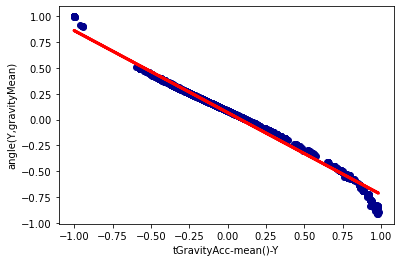

In [24]:
y_pred4 = reg4.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred4))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred4))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred4))

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test,  color='darkblue')
ax1.plot(X_test, y_pred4, color='red', linewidth=3)    
ax1.set_xlabel('tGravityAcc-mean()-Y')
ax1.set_ylabel('angle(Y,gravityMean)')
plt.show()

# MULTIPLE LINEAR REGRESSION

R2: 0.990
MSE: 0.001
MAE: 0.024
Coefficients: 
 [-0.83055186 -0.07608631]
Intercept: 
 0.06343412514100186


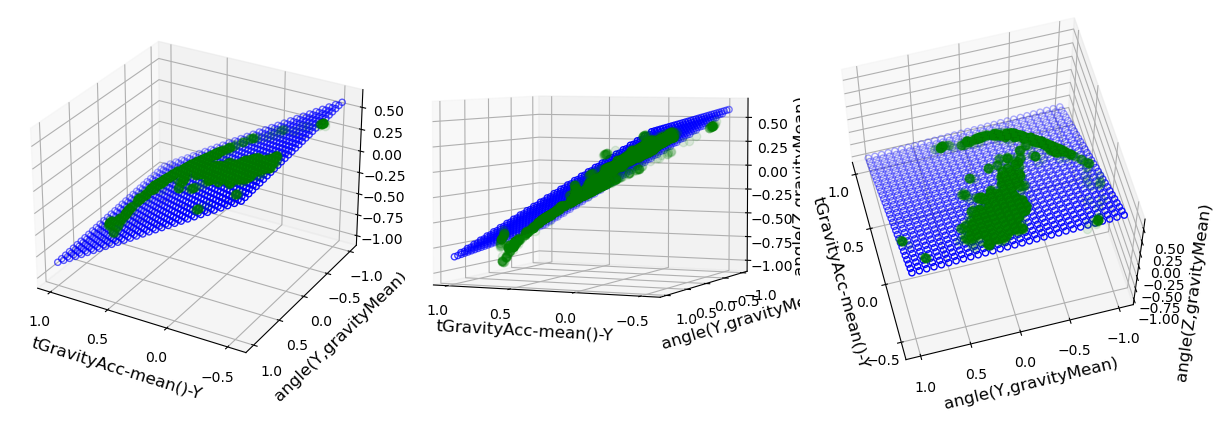

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X_train = train[['tGravityAccmeanY', 'angleZgravityMean']].values
Y_train = train['angleYgravityMean']

X_test = test[['tGravityAcc-mean()-Y', 'angle(Z,gravityMean)']].values
Y_test = test['angle(Y,gravityMean)']
######################## Prepare model data point for visualization ###############################

x = X_train[:, 0]
y = X_train[:, 1]
z = Y_train

x_pred = np.linspace( min(x),max(x), 30)   # range of porosity values
y_pred = np.linspace(min(y),max(y) , 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X_train, Y_train)
predicted = model.predict(model_viz)
Y_pred = model.predict(X_test)

############################################## Evaluate ############################################

r2 = model.score(X_train, Y_train)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='green', zorder=15, linestyle='none', marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='blue')
    ax.set_xlabel('tGravityAcc-mean()-Y', fontsize=12)
    ax.set_ylabel('angle(Y,gravityMean)', fontsize=12)
    ax.set_zlabel('angle(Z,gravityMean)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '',fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y_test, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, Y_pred))
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)